## Patch Duration vs. Morphological Calls(63x) per Post Patch Outcomes

##### Date: 9/01/2017-Present & Update to recent csv by custom reports cell report card 'T301x', 'mIVSCC-MET'

In [1]:
#Import necessary functions
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

#Makes a white backround with gray horizontal gridmarks at y-values
sns.set_style('whitegrid')
sns.set_context('notebook')

#Context: paper
#Context: notebook
#Context: talk
#Context: poster

In [2]:
#ps = patch_seq csv file
df = pd.read_csv("63x.csv")

In [3]:
#list_initial = list with specific columns used from csv file
list_initial = ['recording_date',
                'project', 
                'cell_specimen_name', 
                'ims63x_go_no_go',
                'ephys_seal_gohm',
                'cell_specimen_id',  
                'ephys_roi_result_id']
df = df[list_initial]
df.head()

recording_date project                   cell_specimen_name  \
0  5/1/2015 10:25   T301x  Pvalb-IRES-Cre;Ai14-187029.03.01.01   
1  5/1/2015 10:42   T301x  Pvalb-IRES-Cre;Ai14-187029.04.02.01   
2  5/1/2015 11:41   T301x  Pvalb-IRES-Cre;Ai14-187029.05.01.01   
3  5/1/2015 12:33   T301x  Pvalb-IRES-Cre;Ai14-187029.05.02.01   
4  5/1/2015 15:40   T301x  Pvalb-IRES-Cre;Ai14-185566.03.02.01   

  ims63x_go_no_go  ephys_seal_gohm  cell_specimen_id  ephys_roi_result_id  
0             NaN         1.112216         475888902            475888900  
1             NaN         1.038104         475889062            475889060  
2             NaN         1.823234         475890938            475890936  
3             NaN         1.305476         475892119            475892117  
4             NaN         1.423217         475895174            475895172

In [4]:
#Drops all rows that have NaN specifically in column 63x go or no
df.dropna(subset = ['ims63x_go_no_go'], inplace = True)

In [5]:
df.head(800) #look at 3894

recording_date project                        cell_specimen_name  \
241    5/26/2016 10:30   T301x  Vip-IRES-Cre;Ai14(IVSCC)-247697.03.01.01   
304    6/15/2016 10:50   T301x     Nos1-CreERT2;Ai14(BT)-251975.03.01.01   
445     8/1/2016 12:11   T301x        Chat-IRES-Cre;Ai14-261748.03.01.02   
458     8/3/2016 10:57   T301x        Chat-IRES-Cre;Ai14-261746.03.01.01   
1138  10/24/2016 11:21   T301x        Gad2-IRES-Cre;Ai14-280180.07.01.02   
1150  10/25/2016 10:58   T301x        Gad2-IRES-Cre;Ai14-280036.07.02.01   
1157  10/25/2016 14:08   T301x        Gad2-IRES-Cre;Ai14-280036.07.01.04   
1172  10/26/2016 13:34   T301x        Gad2-IRES-Cre;Ai14-280035.07.02.02   
1177  10/26/2016 14:51   T301x        Gad2-IRES-Cre;Ai14-280035.07.02.04   
1181  10/27/2016 11:09   T301x        Gad2-IRES-Cre;Ai14-280034.08.01.01   
1182  10/27/2016 11:25   T301x        Gad2-IRES-Cre;Ai14-280034.07.01.03   
1245   11/2/2016 11:01   T301x        Gad2-IRES-Cre;Ai14-280183.07.01.01   
1285   11/4/2016 13:45   T301x        Gad2-IRES-Cre;Ai14-280181.07.02.01   
1287   11/4/2016 14:03   T301x        Gad2-IRES-Cre;Ai14-280181.07.02.02   
1735    1/4/2017 14:55   T301x        Gad2-IRES-Cre;Ai14-292660.08.01.02   
1736    1/4/2017 15:23   T301x        Gad2-IRES-Cre;Ai14-292660.08.01.03   
1745    1/5/2017 13:48   T301x        Gad2-IRES-Cre;Ai14-292659.07.02.01   
1758    1/6/2017 11:01   T301x        Gad2-IRES-Cre;Ai14-292658.06.01.02   
1763    1/6/2017 13:23   T301x        Gad2-IRES-Cre;Ai14-292658.07.01.02   
1764    1/6/2017 13:42   T301x        Gad2-IRES-Cre;Ai14-292658.07.02.01   
1784   1/11/2017 13:48   T301x        Gad2-IRES-Cre;Ai14-293418.07.02.01   
1794   1/12/2017 13:59   T301x     Slc32a1-IRES-Cre;Ai14-294507.08.01.02   
1820   1/17/2017 14:39   T301x     Slc32a1-IRES-Cre;Ai14-295046.08.01.03   
1822   1/17/2017 15:06   T301x     Slc32a1-IRES-Cre;Ai14-295046.08.01.04   
1826   1/18/2017 11:15   T301x     Slc32a1-IRES-Cre;Ai14-294509.06.02.01   
1827   1/18/2017 11:53   T301x     Slc32a1-IRES-Cre;Ai14-294509.06.02.02   
1831   1/18/2017 14:50   T301x     Slc32a1-IRES-Cre;Ai14-294509.07.02.01   
1832   1/18/2017 15:20   T301x     Slc32a1-IRES-Cre;Ai14-294509.07.02.02   
1956    2/1/2017 13:52   T301x        Gad2-IRES-Cre;Ai14-296620.07.01.01   
2301   3/14/2017 11:58   T301x       Pvalb-IRES-Cre;Ai14-304102.07.02.01   
...                ...     ...                                       ...   
3892   8/31/2017 21:43   T301x       Pvalb-IRES-Cre;Ai14-344090.05.01.03   
3893   8/31/2017 22:04   T301x       Pvalb-IRES-Cre;Ai14-344090.05.01.04   
3894    9/1/2017 17:36   T301x      Htr3a-Cre_NO152;Ai14-343221.05.02.01   
3895    9/1/2017 17:46   T301x      Htr3a-Cre_NO152;Ai14-343221.05.01.01   
3896    9/1/2017 17:56   T301x      Htr3a-Cre_NO152;Ai14-343221.05.02.02   
3897    9/1/2017 18:16   T301x      Htr3a-Cre_NO152;Ai14-343221.05.01.02   
3899    9/1/2017 20:09   T301x       Scnn1a-Tg3-Cre;Ai14-346622.05.02.01   
3901    9/1/2017 20:31   T301x       Scnn1a-Tg3-Cre;Ai14-346622.05.02.02   
3902    9/1/2017 20:47   T301x       Scnn1a-Tg3-Cre;Ai14-346622.04.02.01   
3903    9/1/2017 20:59   T301x       Scnn1a-Tg3-Cre;Ai14-346622.05.02.03   
3906    9/6/2017 21:56   T301x       Pvalb-IRES-Cre;Ai14-344091.04.01.01   
3907    9/6/2017 22:38   T301x       Pvalb-IRES-Cre;Ai14-344091.04.01.02   
3908   9/11/2017 21:49   T301x         Sst-IRES-Cre;Ai14-346778.03.02.01   
3910   9/11/2017 22:22   T301x         Sst-IRES-Cre;Ai14-346778.03.02.02   
3912    9/12/2017 0:28   T301x       Scnn1a-Tg2-Cre;Ai14-346634.04.01.01   
3913    9/12/2017 1:12   T301x       Scnn1a-Tg2-Cre;Ai14-346634.04.01.02   
3914   9/12/2017 18:01   T301x         Sst-IRES-Cre;Ai14-346780.04.02.01   
3915   9/12/2017 18:54   T301x         Sst-IRES-Cre;Ai14-346780.04.02.02   
3916   9/12/2017 19:35   T301x         Sst-IRES-Cre;Ai14-346780.04.02.03   
3920   9/13/2017 17:24   T301x         Sst-IRES-Cre;Ai14-346782.05.02.01   
3921   9/13/2017 17:52   T301x         Sst-IRES-Cre;Ai14

In [6]:
#Creating new dataframe by splitting at loc 3894
#3894 is where 9/01/2017 starts (production date)
df1 = df.loc[3894:]
df1.head()

recording_date project                    cell_specimen_name  \
3894  9/1/2017 17:36   T301x  Htr3a-Cre_NO152;Ai14-343221.05.02.01   
3895  9/1/2017 17:46   T301x  Htr3a-Cre_NO152;Ai14-343221.05.01.01   
3896  9/1/2017 17:56   T301x  Htr3a-Cre_NO152;Ai14-343221.05.02.02   
3897  9/1/2017 18:16   T301x  Htr3a-Cre_NO152;Ai14-343221.05.01.02   
3899  9/1/2017 20:09   T301x   Scnn1a-Tg3-Cre;Ai14-346622.05.02.01   

     ims63x_go_no_go  ephys_seal_gohm  cell_specimen_id  ephys_roi_result_id  
3894       63x no go         2.461183         615504916            615504814  
3895          63x go         2.897146         615517802            615517699  
3896       63x no go         1.669511         615517942            615517864  
3897          63x go         0.952281         615530052            615529728  
3899       63x no go         3.079292         615600778            615600756

### Tried simple plot with only 63x csv

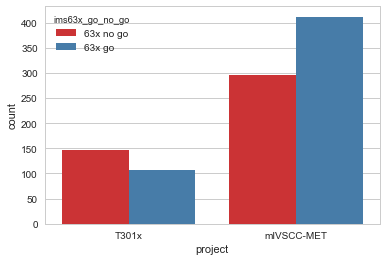

In [7]:
sns.countplot(x = 'project',
              hue = 'ims63x_go_no_go', 
              data = df1, 
              palette = "Set1")
#.set_title("Title")
#plt.xlabel("X")
#plt.ylabel("Y")